In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [101]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [102]:
df.drop(['Formatted Date', 'Summary','Daily Summary', 'Loud Cover'], axis=1, inplace=True)

In [103]:
df['Precip Type'].fillna('clear', inplace=True)

In [104]:
le = LabelEncoder()
df['Precip Type'] = le.fit_transform(df['Precip Type'])

In [105]:
df.corr()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,1.000000,-0.542245,-0.545264,0.223896,-0.068319,-0.040390,-0.291999,0.006472
Temperature (C),-0.542245,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),-0.545264,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,0.223896,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),-0.068319,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),-0.040390,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),-0.291999,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),0.006472,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [106]:
df.drop(['Pressure (millibars)','Wind Speed (km/h)','Wind Bearing (degrees)'], axis=1, inplace=True)

In [107]:
rain = df[df['Precip Type'] == 1]
snow = df[df['Precip Type'] == 2]
clear = df[df['Precip Type'] == 0]

train_rain, test_rain = train_test_split(rain, test_size=0.3)
train_snow, test_snow = train_test_split(snow, test_size=0.3)
train_clear, test_clear = train_test_split(clear, test_size=0.3)

In [108]:
train = pd.concat([train_rain, train_snow, train_clear])
test = pd.concat([test_rain, test_snow, test_clear])

In [109]:
# Shuffle the data
train = train.sample(frac=1)
test = test.sample(frac=1)

# Split the data into X and y
X_train = train.drop(['Precip Type'], axis=1)
y_train = train['Precip Type']
X_test = test.drop(['Precip Type'], axis=1)
y_test = test['Precip Type']

In [110]:
knn = KNeighborsClassifier()

In [111]:
knn.fit(X_train, y_train)
knnScore = knn.score(X_test, y_test)
knnPredict = knn.predict(X_test)

In [112]:
svm = LinearSVC(dual=False)

In [113]:
svm.fit(X_train, y_train)
svmScore = svm.score(X_test, y_test)
svmPredict = svm.predict(X_test)

In [114]:
nb = MultinomialNB()

In [115]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [116]:
nb.fit(X_train, y_train)
nbScore = nb.score(X_test, y_test)
nbPredict = nb.predict(X_test)

In [117]:
print(f'knn accuracy: {knnScore.round(decimals=4)*100}%')
print(f'svm accuracy: {svmScore.round(decimals=4)*100}%')
print(f'nb accuracy: {nbScore.round(decimals=4)*100}%')

knn accuracy: 98.9%
svm accuracy: 99.42%
nb accuracy: 88.35%


In [118]:
knn_cm = confusion_matrix(y_test, knnPredict)
svm_cm = confusion_matrix(y_test, svmPredict)
nb_cm = confusion_matrix(y_test, nbPredict)


In [119]:
knn_cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=le.classes_)
svm_cm_display = ConfusionMatrixDisplay(svm_cm, display_labels=le.classes_)
nb_cm_display = ConfusionMatrixDisplay(nb_cm, display_labels=le.classes_)

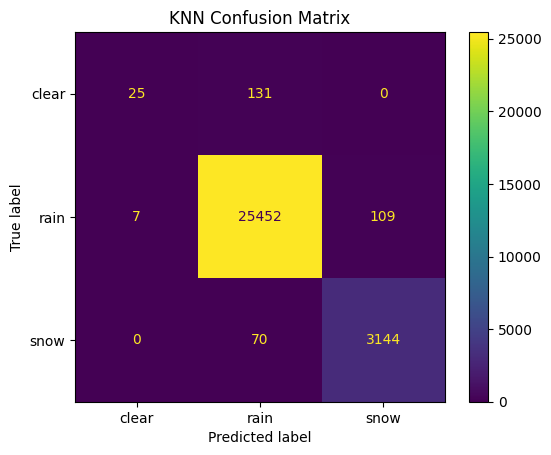

In [120]:
knn_cm_display.plot()
plt.title('KNN Confusion Matrix')
plt.show()

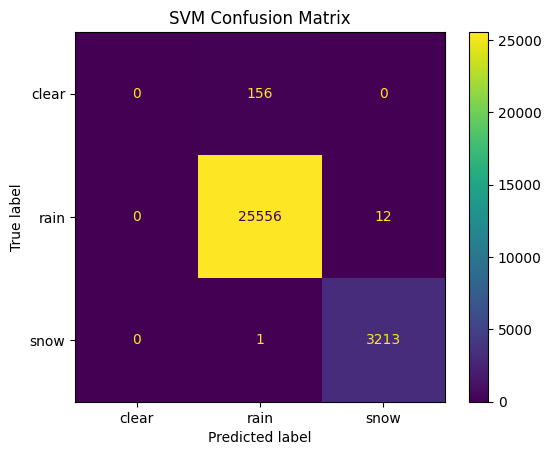

In [121]:
svm_cm_display.plot()
plt.title('SVM Confusion Matrix')
plt.show()

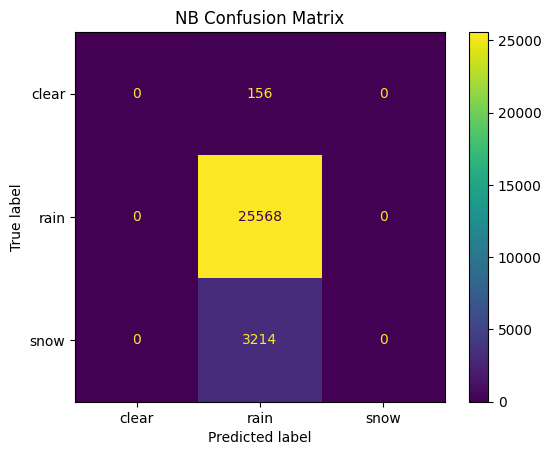

In [122]:
nb_cm_display.plot()
plt.title('NB Confusion Matrix')
plt.show()

In [123]:
def makePrediction(list):
    t = pd.DataFrame({'Temperature (C)':[list[0]],'Apparent Temperature (C)':[list[1]],'Humidity':[list[2]],'Visibility (km)':[list[3]]})
    y = knn.predict(t)[0]
    if y == 0:
        return 'Better luck next time!'
    elif y == 1:
        return 'Get ready for a free shower!'
    else:
        return 'Better bring your snow boots!'